#### 1. Setup and Data loading

In [124]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import and Read the data
data = pd.read_csv(r"cookie_cats.csv")
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


#### 2. Basic data understanding

In [126]:
def data_statistics(df):
    print("# Simple Statistics about the data.....")
    print("-" * 50)
    
    # Corrected Shape access
    print(f"Shape: {df.shape[0]} Rows, {df.shape[1]} Columns")
    print("-" * 50)

    print("# Data types:")
    print(df.dtypes)  # Attribute, no parentheses
    print("-" * 50)

    print("# Missing values per column:")
    print(df.isnull().sum())
    print("-" * 50)

    total_memory = df.memory_usage(deep=True).sum() / 1024**2
    print(f"# Total Memory Usage: {total_memory:.2f} MB")
    print("-" * 50)
    
    # Use display() for a pretty table in Notebooks
    print(f"# Statistical Summary: \n{df.describe(include = 'all')}")
   

data_statistics(data)

# Simple Statistics about the data.....
--------------------------------------------------
Shape: 90189 Rows, 5 Columns
--------------------------------------------------
# Data types:
userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object
--------------------------------------------------
# Missing values per column:
userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64
--------------------------------------------------
# Total Memory Usage: 6.36 MB
--------------------------------------------------
# Statistical Summary: 
              userid  version  sum_gamerounds retention_1 retention_7
count   9.018900e+04    90189    90189.000000       90189       90189
unique           NaN        2             NaN           2           2
top              NaN  gate_40             NaN       False       False
freq             NaN    45489             NaN  

#### Summary
- We have loaded Cookie_Cat.csv file. This file have 90158 observations (rows), and five columns. Those are 'userid'-integer type, 'version'-object type, 'sum_gamerounds'-integer type, 'retention_1'-boolean type, and 'retention_7'-boolean type
- The dataset do not have any missing valus or null values

#### 3. Check A/B group balance

In [128]:
# How many players in each version group
print(data['version'].value_counts())

# Proportion in each group
print(data['version'].value_counts(normalize = True))

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64
version
gate_40    0.504374
gate_30    0.495626
Name: proportion, dtype: float64


#### Summary
- In the dataset we have 'version' column. Inside the version column, we have two types of versions.'gate_30', and 'gate_40'
- Total users for the 'gate_30' version is 45489, and for the 'gate_40' version is 44700

#### 4. Overall Retention rates

In [130]:
# Overall 1-Day and 7-Day retention
overall_ret1 = data['retention_1'].mean()
overall_ret7 = data['retention_7'].mean()

overall_ret1, overall_ret7

(0.4452095044850259, 0.1860648194347426)

#### Summary
- We have 1-Day total retention rate is 44%. it means out of 100 new users who are playing the game first time, they are again visiting the app to play the game. Almost 50% users are repeat users on the Day_1 itself
- After the 7-Day of total retention most of the users are not that much hook to the Cookie cat game. We can see just 18% users are only coming again to play the game after 7th day.

#### 5. Retention by version (Group)

In [132]:
# Grouped Retention
ret1_by_version = data.groupby('version')['retention_1'].mean()
ret7_by_version = data.groupby('version')['retention_7'].mean()

ret1_by_version, ret7_by_version

(version
 gate_30    0.448188
 gate_40    0.442283
 Name: retention_1, dtype: float64,
 version
 gate_30    0.190201
 gate_40    0.182000
 Name: retention_7, dtype: float64)

#### Summary
- In the 1-day retention we can see most of the users are there in the gate_30 version, comparing with the gate_40 at first day 0.448 and 0.442 respectively in 1-Day retention
- In the 7-Day retention, again we can see gate_30 version have slight higher retention rate comparing with the gate_40 version. This clearly show users are more likely play with the gate_30 version.

#### 6. Simple bar plots for retention

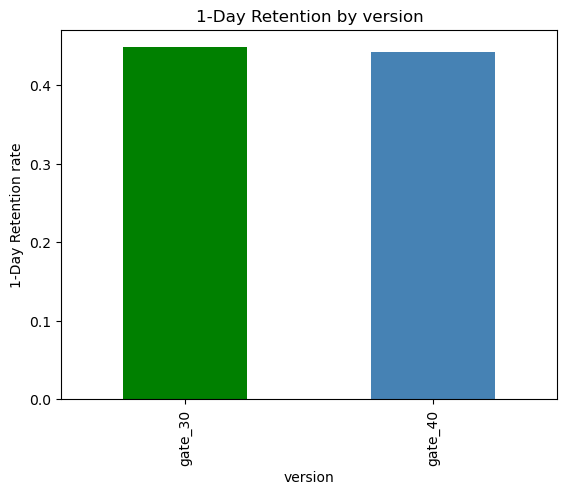

In [134]:
# Barplot for 1-Day Retention
ret1_by_version.plot(kind = 'bar', color = ['green', 'steelblue'])
plt.ylabel('1-Day Retention rate')
plt.title("1-Day Retention by version")
plt.savefig("1-Day Retention by version")
plt.show()

#### Summary
- From the above Bar chart we can confirm that gate_30 version have more retention of users comparing with the gate_40 version on 1-Day retention period

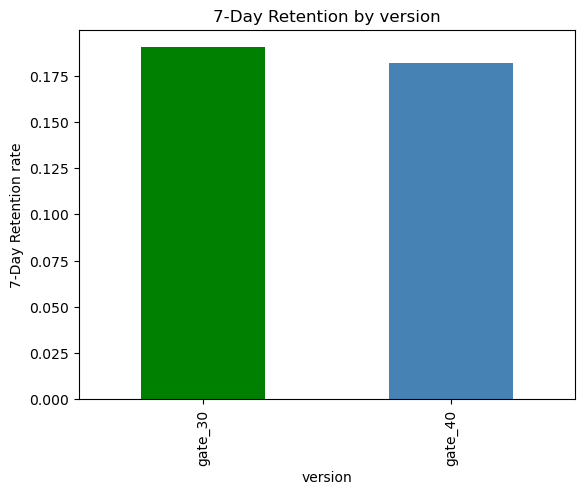

In [136]:
# Barplot for 7-Day Retention
ret7_by_version.plot(kind = 'bar', color = ['green', 'steelblue'])
plt.ylabel("7-Day Retention rate")
plt.title("7-Day Retention by version")
plt.savefig("7-Day Retention by version")
plt.show()

#### Summary
- From the above Bar chart again we can confirm that gate_30 version have more retention of users comparing with the gate_40 version on 7-Day retention period

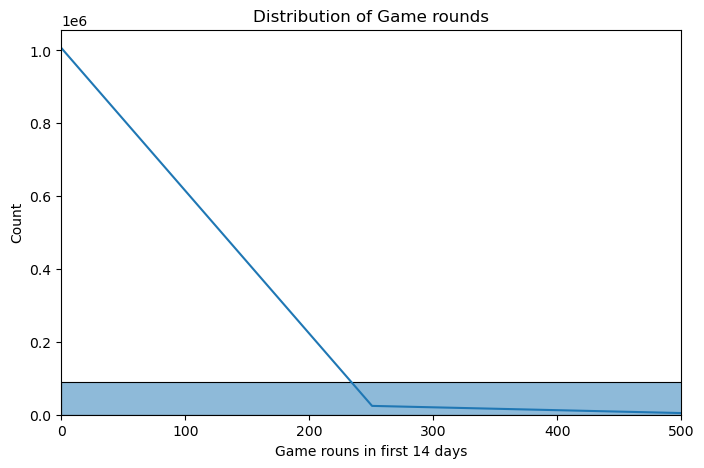

In [138]:
#### 7. Distribution of Gamerounds
plt.figure(figsize = (8, 5))
sns.histplot(data['sum_gamerounds'], bins = 50, kde = True)
plt.xlim(0, 500) # Limit to see main mass
plt.xlabel("Game rouns in first 14 days")
plt.title("Distribution of Game rounds")
plt.savefig("Distribution of Game rounds")
plt.show()

#### Summary
- We can see very less number of player are completed more rounds, and higher values are  distributed more on right side and have longer tail in Right side (right skewed), so we are applying the Log Transformation to the sum_gamerounds column

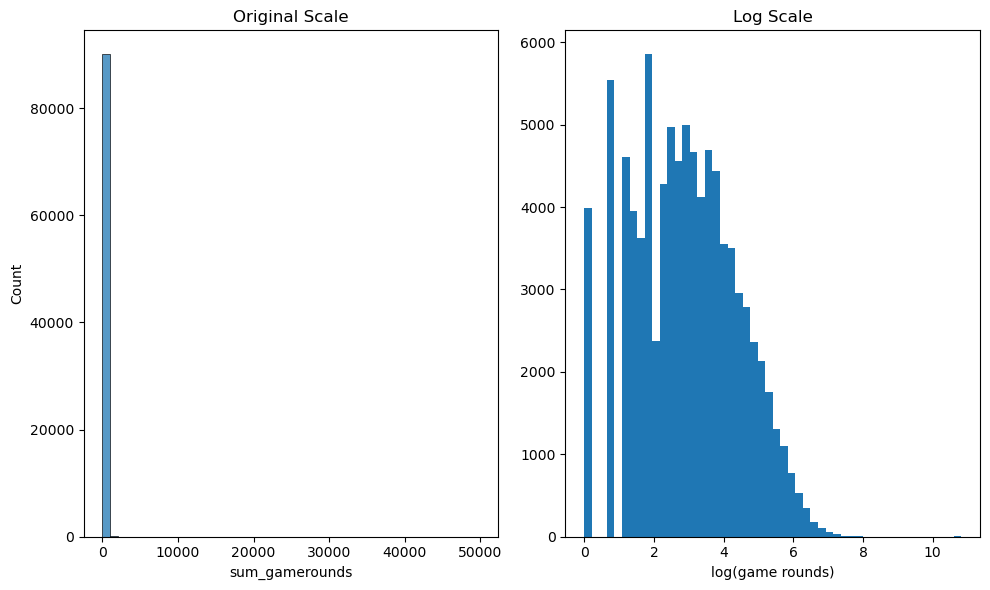

In [140]:
# Plotting the original scale and also Log Transformed 'Sum_Gamerounds'
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['sum_gamerounds'], bins = 50)
plt.title("Original Scale")

plt.subplot(1, 2, 2)
plt.hist(np.log1p(data['sum_gamerounds']), bins = 50)
plt.title('Log Scale')
plt.xlabel('log(game rounds)')
plt.tight_layout()
plt.savefig("Original scale vs Log scale Histogram")
plt.show()

#### Summary
- In the above we have side by side comparision of before and after applying the Log transformation to the Sum_Gamerounds column.
- By applying the Log Transformation to the sum_gamerounds column helped alot, it made that column data distribution into almost Normal distribution.

### Hyothesis Assumptions
> Null Hypothesis (H0): No difference between in 'gate_30' and 'gate_40' version retention

> Alternative Hypothesis (H1): There is difference between in 'gate_30' and 'gate_40' version retention

-  

#### 8. Hypothesis Testing with a Two-sample Proportion z-test

In [48]:
from statsmodels.stats.proportion import proportions_ztest

# 1. Get counts of users who returned (successes in each group)
ret1_counts = data.groupby('version')['retention_1'].sum() # It will count all the one's in Retention1 column
ret1_nobs = data.groupby('version')['retention_1'].count() # retention 1 number of Observations

ret1_counts, ret1_nobs

(version
 gate_30    20034
 gate_40    20119
 Name: retention_1, dtype: int64,
 version
 gate_30    44700
 gate_40    45489
 Name: retention_1, dtype: int64)

#### Summary
- In the above output we can see version gate_30 have total 20034 retention successes, and version_40 have 20119 retention successes, under the 1-Day retention column.
- Total oberservations in the 1-Day retention column for the gate_30 version is 44700, and 45489 for the gate_40 version respectively.

In [52]:
# 2. Arrange in correct order: Gate_30 then Gate_40
counts = np.array([ret1_counts['gate_30'], ret1_counts['gate_40']])
nobs = np.array([ret1_nobs['gate_30'], ret1_nobs['gate_40']])

# 3. Two sided z-test
stat, pval = proportions_ztest(count = counts, nobs = nobs, alternative = 'two-sided')
stat, pval

(1.7840862247974725, 0.07440965529691913)

#### Summary
- In the above output we can see, statistic value for two sided z-test is 1.78, and p value is 0.074.
- Day-1 Rentention: p = 0.074 >= 0.05, it means we are **Fail to Reject null** hypothesis. We can say, there is **No significant day 1** difference.

#### 9. Hypothesis testing for 7-day retention

In [54]:
# 7-Day Retention counts and totals
ret7_counts = data.groupby('version')['retention_7'].sum()
ret7_nobs = data.groupby('version')['retention_7'].count()

ret7_counts, ret7_nobs

(version
 gate_30    8502
 gate_40    8279
 Name: retention_7, dtype: int64,
 version
 gate_30    44700
 gate_40    45489
 Name: retention_7, dtype: int64)

#### Summary
- In the above output we can see version gate_30 have total 8502 retention successes, and version_40 have 8279 retention successes, under the 7-Day retention column.
- Total oberservations in the 1-Day retention column for the gate_30 version is 44700, and 45489 for the gate_40 version respectively.

In [56]:
# Arrange in same order as before
counts7 = np.array([ret7_counts['gate_30'], ret7_counts['gate_40']])
nobs7 = np.array([ret7_nobs['gate_30'], ret7_nobs['gate_40']])

stat7, pval7 = proportions_ztest(count = counts7, nobs = nobs7, alternative = 'two-sided')
stat7, pval7

(3.164358912748191, 0.001554249975614329)

#### Summary
- In the above output we can see, statistic value for two sided z-test is 3.16, and p value is 0.0015
- Day-7 Retention: p = 0.0016 < 0.05. We are rejecting the **Null Hypothesis**. Based on this we can say 'In Day 7 retention comparing with the gate_40, gate_30 is better engaging the users'.

### 10. Bootstrapping
- We have p_value for gate_30 in 1-Day retention is 0.74, and for gate_40 is 1.78. There is almost 1.0 difference is there. That difference is luck or by any chance, we can check this by applying the **Bootstrapping**.
- It means we are doing 'Resampling with Replacement'. In simple words, we can take our data, randomly pick version, and then replace with the different version.
- It can calculate retention_1 for multiple times. This process can repeat 5000 times.
- We can apply this for both Retention_1 and Retention_7 for the both version (gate_30 and gate_40). This is make our stat values and p value assumptions more clear.
- **Why do we need to do Bootstrapping**: How confidently we are saying the which version is better engaging users with the help of **Confidence Interval values**.

#### Bootstrapping Assumptions we need to follow
- in our code because of this line: diff = sample_a.mean() - sample_b.mean(), in this
 sample_a = gate_30 retention, sample_b = gate_40 retention. So Positive values indicates the gate_30 better, negitive values indicates gate_40 is better, if any of the values are negitive, it means we were unable to single version is best

**Examples**:
- If lower value and upper values both are **positive** values like these (eg: lower = 0.002344, upper = 0.0103023), we can say **'gate_30'** version is better than the 'gate_40' version
- If lower value and upper values both are **negitives** values like these (eg: lower = -0.002344, upper = -0.0103023), we can say **'gate_40'** version is better than the 'gate_30' version
- If one value (lower or upper) is positive and another value is negitive value or viseversa like these (eg: lower = -0.002344, upper = 0.0103023 or lower = 0.002344, upper = -0.0103023), we can not say **any one of the version is good**. It means answer is unable to single version is best.

#### Bootstrap for 1-Day Retention

In [60]:
# Filter Groups
gate_30 = data[data['version'] == 'gate_30']
gate_40 = data[data['version'] == 'gate_40']

# Function to bootstarp difference in 21 day retention (Gate_30, Gate40)
def bootstrap_diff_retention(data_a, data_b, n_boot = 5000, seed = 42):
    rng = np.random.default_rng(seed)
    diffs = []

    a = data_a['retention_1'].values
    b = data_b['retention_1'].values

    n_a = len(a)
    n_b = len(b)

    for _ in range(n_boot):
        sample_a = rng.choice(a, size = n_a, replace = True)
        sample_b = rng.choice(b, size = n_b, replace = True)
        diff = sample_a.mean() - sample_b.mean()
        # sample_a = gate_30 retention, sample_b = gate_40 retention
        diffs.append(diff)

    return np.array(diffs)

boot_diffs_1 = bootstrap_diff_retention(gate_30, gate_40, n_boot = 5000)
boot_diffs_1[:10]

array([ 0.00773303,  0.00957485,  0.00587052,  0.00766966,  0.01104152,
        0.00639862,  0.00835593,  0.00399146, -0.00189053,  0.00543551])

In [62]:
# 95% Confidence interval for the Difference
lower_1 = np.percentile(boot_diffs_1, 2.5)
upper_1 = np.percentile(boot_diffs_1, 97.5)
lower_1, upper_1

(-0.0005443940573582398, 0.012267815613214852)

#### Summary
- In the above by using bootstrapping we have generated 5000 sample p values. Out of that 5000 values, we print first 10 values using head()
- For 1-day retention bootstrap lower value is -0.0005, and upper value 0.012. Both values are less than zero. we can not say either gate_30 or gate_40 version is good or more engaging the users, from this Bootstrap experiment.

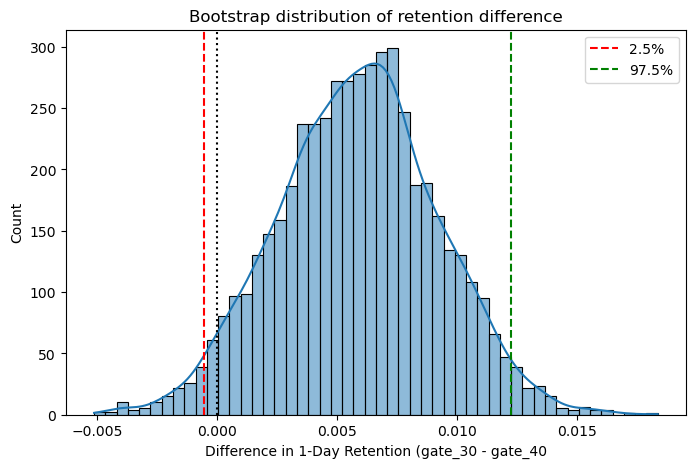

In [142]:
# Plot for Bootstrap Distribution
plt.figure(figsize = (8, 5))
sns.histplot(boot_diffs_1, bins = 50, kde = True)
plt.axvline(lower_1, color = 'red', linestyle = '--', label = '2.5%')
plt.axvline(upper_1, color = 'green', linestyle = '--', label = '97.5%')
plt.axvline(0, color = 'black', linestyle = ':')
plt.xlabel('Difference in 1-Day Retention (gate_30 - gate_40')
plt.title('Bootstrap distribution of retention difference')
plt.legend()
plt.savefig('Bootstrap distribution of retention difference')
plt.show()

#### Summary
- The above histogram shows that the data is normally distributed, and retention rate is just 0.015 over the 90% of data distribution

#### 11. Bootstrap for 7-Day retention difference

In [78]:
def bootstrap_diff_retention7(data_a, data_b, n_boot = 5000, seed = 42):
    rng = np.random.default_rng(seed)
    diffs = []

    a = data_a['retention_7'].values
    b = data_b['retention_7'].values

    n_a = len(a)
    n_b = len(b)

    for _ in range(n_boot):
        sample_a = rng.choice(a, size = n_a, replace = True)
        sample_b = rng.choice(b, size = n_b, replace = True)
        diff = sample_a.mean() - sample_b.mean()
        diffs.append(diff)

    return np.array(diffs)

boot_diffs_7 = bootstrap_diff_retention7(gate_30, gate_40, n_boot = 5000)

lower_7 = np.percentile(boot_diffs_7, 2.5)
upper_7 = np.percentile(boot_diffs_7, 97.5)
lower_7, upper_7

(0.003286390758087239, 0.013430416026531075)

#### Summary
- In above we can see lower_7 and upper_7 both values are positive (0.0032, and 0.013), We confidently say that **gate_30 version** is better engaging the users comparing the **gate_40 version**.

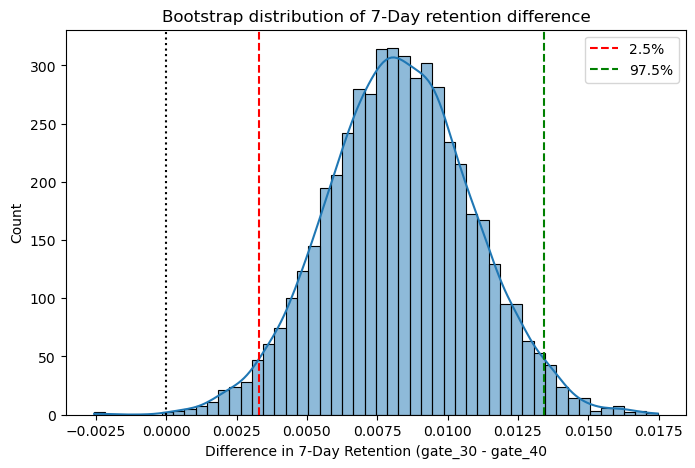

In [144]:
# Plot the Bootstrap Distribution
plt.figure(figsize = (8, 5))
sns.histplot(boot_diffs_7, bins = 50, kde = True)
plt.axvline(lower_7, color = 'red', linestyle = '--', label = '2.5%')
plt.axvline(upper_7, color = 'green', linestyle = '--', label = '97.5%')
plt.axvline(0, color = 'black', linestyle = ':')
plt.xlabel("Difference in 7-Day Retention (gate_30 - gate_40")
plt.title("Bootstrap distribution of 7-Day retention difference")
plt.legend()
plt.savefig("Bootstrap distribution of 7-Day retention difference")
plt.show()

#### Summary
- From the above graph we can say most of the data was distributed over the positive values side.

### **Final Verdict about this experiment**
#### Key Results Summary of this project
- **Day 1 Retention:** p=0.074 > 0.05 → No statistically significant difference (Failed to Reject Null Hypothesis)
- **Day 7 Retention:** p=0.0016 < 0.05 → gate_30 significantly better (We are Rejecting Null Hypothesis)

#### Bootstrap Confirmation
- Day 1 CI crosses 0 → inconclusive
- Day 7 CI entirely positive → gate_30 advantage confirmed

## Business Recommendation from this Project
**Comparing with gate_40, gate_30 leads to more 7-day retention/stickiness (p=0.0016, CI=[0.003,0.013]). Day 1 shows borderline improvement (p=0.074). Recommend gate_30 for better long-term engagement.**